In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:

def read_data(filename):
    data = np.loadtxt('../data/'+filename+'.txt', delimiter=' ')
    return data



In [4]:

#Data files belong to cold dark matter halo simulations of Milky Way particles interacting with the Large Magellanic Cloud (LMC)
#mw prefix is for MW particles in the non interacting regime
#lmc prefix is for MW particles in perturbed dark matter halo

data_mw = read_data('rand_mwb1_000')
data_lmc = read_data('rand_mwlmcb1_110')


#Potential energy of particles in dark matter halo
pot_mw = data_mw[:,6]
pot_mw_lmc = data_lmc[:,6]

#Extract velocity magnitude of particles in dark matter halo
v_mw = data_mw[:,3:6]
v_mw_lmc = data_lmc[:,3:6]

#Extract index of particles
idx_mw = data_mw[:,7]
idx_lmc = data_lmc[:,7]


In [5]:
def calculate_v_mag_square(v_mw):
    v_mag = np.sqrt(v_mw[:,0]**2+v_mw[:,1]**2+v_mw[:,2]**2)
    return v_mag

v_mag_square_mw = calculate_v_mag_square(v_mw)
v_mag_square_mw_lmc = calculate_v_mag_square(v_mw_lmc)



E_mw = pot_mw+v_mag_square_mw
E_mw_lmc = pot_mw_lmc+v_mag_square_mw_lmc

#Positions and velocities of Milky Way galaxy dark matter halo particles

pos_mw = data_mw[:,0:3]
pos_mw_lmc = data_lmc[:,0:3]


vel_mw = data_mw[:,3:6]
vel_mw_lmc = data_lmc[:,3:6]



In [6]:

#Calculate angular momentum components

def angular_momentum(pos, vel):
    """Calculate angular momentum components of particles given position an velocity arrays.

    Args:
        pos (_array_): _Position 3 dim_
        vel (_array_): _Velocities 3 dim_

    Returns:
        _1d array_: Angular momenta in each direction and total mag__
    """
    L = np.cross(pos, vel)
    mag = np.linalg.norm(L, axis=1)
    return L[:,0], L[:,1], L[:,2], mag

Lx1, Ly1, Lz1, L_mag_mw = angular_momentum(pos_mw, vel_mw)
Lx2, Ly2, Lz2, L_mag_mw_lmc = angular_momentum(pos_mw_lmc, vel_mw_lmc)
pos_mag_mw = np.linalg.norm(pos_mw, axis=1)
pos_mag_lmc = np.linalg.norm(pos_mw_lmc, axis=1)


C:\Users\Stephanie\AppData\Local\Temp\ipykernel_5564\1673705552.py:11: RuntimeWarning: divide by zero encountered in log10
  im = plt.imshow(np.log10(hist_r_L.T), extent=[50, 250, 0, 50000], aspect='auto', origin='lower', vmin=0, vmax=5,cmap='Greys')


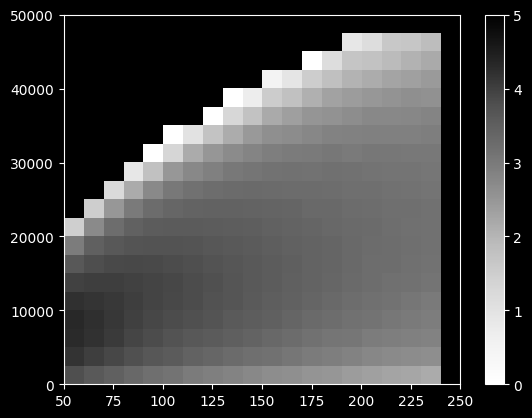

In [7]:

#Range and step def for distance and angular momentum arrays

r =  np.arange(50,250,10)
L = np.arange(9,50000,2500)
hist_r_L = np.zeros((len(r),len(L)))
for i in range(0,len(r)-1):
    r_index = np.where((pos_mag_mw > r[i]) & (pos_mag_mw < r[i+1]))
    for j in range(0,len(L)-1):
        Nl = np.where((L_mag_mw[r_index]> L[j]) & (L_mag_mw[r_index] < L[j+1]))
        hist_r_L[i,j] = np.shape(Nl)[1]
im = plt.imshow(np.log10(hist_r_L.T), extent=[50, 250, 0, 50000], aspect='auto', origin='lower', vmin=0, vmax=5,cmap='Greys')
plt.colorbar()


In [8]:

# low_L = np.where(L_mag_mw < 5000)
low_L = np.where (L_mag_mw < 10000)
high_L = np.where(L_mag_mw > 10000)


In [9]:

# print(low_L[0], medium_L[0], high_L[0])
def hist_L_r(pos,ang_m):
    r =  np.arange(50,250,10)
    L = np.arange(9,50000,2500)
    hist_r_L = np.zeros((len(r),len(L)))
    for i in range(0,len(r)-1):
        r_index = np.where((pos > r[i]) & (pos < r[i+1]))
        for j in range(0,len(L)-1):
            Nl = np.where((ang_m[r_index]> L[j]) & (ang_m[r_index] < L[j+1]))
            hist_r_L[i,j] = np.shape(Nl)[1]
    im = plt.imshow(np.log10(hist_r_L.T), extent=[50, 250, 0, 50000], aspect='auto', origin='lower', vmin=0, vmax=5,cmap='Greys')
    plt.colorbar()
    return hist_r_L

# def regions(pos):
#     L1 = pos +5000
#     L2 = pos +10000
#     return L1, L2
# lines_mw = regions(pos)
# L1 = lines_mw[0]
# L2 = lines_mw[1]
# ind = []
# for i in range(0,len(pos)):
#     if ang_m > L1[i] and ang_m[i] < L2[i]:
#         ind.append(i)
# print(len((low_L)))


In [10]:
print(len(pos_mag_lmc[low_L]))

307754


C:\Users\Stephanie\AppData\Local\Temp\ipykernel_5564\2698155500.py:11: RuntimeWarning: divide by zero encountered in log10
  im = plt.imshow(np.log10(hist_r_L.T), extent=[50, 250, 0, 50000], aspect='auto', origin='lower', vmin=0, vmax=5,cmap='Greys')


array([[2.936e+03, 8.107e+03, 1.011e+04, 8.394e+03, 2.856e+03, 4.600e+02,
        2.150e+02, 1.000e+02, 9.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [2.306e+03, 5.565e+03, 8.268e+03, 9.690e+03, 3.171e+03, 4.860e+02,
        1.670e+02, 1.010e+02, 5.800e+01, 1.200e+01, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [1.756e+03, 5.270e+03, 8.252e+03, 7.915e+03, 2.698e+03, 4.710e+02,
        1.140e+02, 6.500e+01, 5.200e+01, 3.000e+01, 8.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [1.669e+03, 4.602e+03, 6.088e+03, 5.165e+03, 2.221e+03, 5.440e+02,
        1.340e+02, 4.600e+01, 3.300e+01, 2.700e+01, 9.000e+00, 3.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 

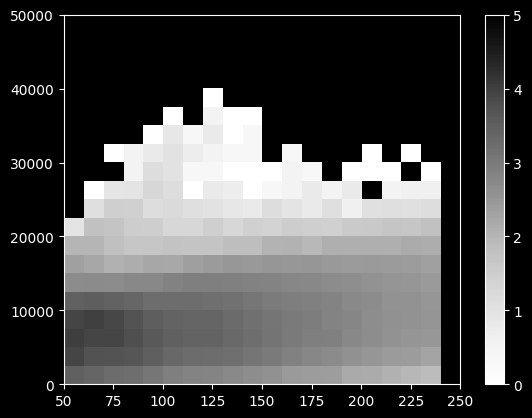

In [11]:
# hist_L_r(pos_mag_mw[low_L], L_mag_mw[low_L])
# hist_L_r(pos_mag_mw[medium_L], L_mag_mw[medium_L])
# hist_L_r(pos_mag_mw[high_L], L_mag_mw[high_L])

hist_L_r(pos_mag_lmc[low_L], L_mag_mw_lmc[low_L])
# hist_L_r(pos_mag_lmc[medium_L], L_mag_mw_lmc[medium_L])
# hist_L_r(pos_mag_lmc[high_L], L_mag_mw_lmc[high_L])


In [12]:
def momentum_regions(pos):
    L_1 = 200*(pos-50) + 10000
    L_2 = 200*(pos-50) + 25000
    return L_1, L_2

list_index_momentum_region = []

for i in range(len(pos_mag_lmc[low_L])):
    line1, line2 = momentum_regions(pos_mag_lmc[low_L][i])
    if ((L_mag_mw_lmc[low_L][i] > line1 ) & (L_mag_mw_lmc[low_L][i] < line2)):
        list_index_momentum_region.append(i)
    # print(i)

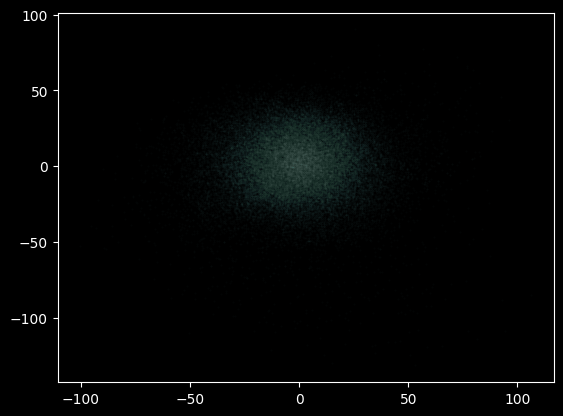

In [13]:
plt.scatter(pos_mw_lmc[low_L,1][0][list_index_momentum_region],    
            pos_mw_lmc[low_L,2][0][list_index_momentum_region], s=1, alpha=0.01)
plt.savefig('./../media/imgs/wakefinder/momentum_region.jpg')